* 本部分涉及到数据分析和特征工程部分
**************
特征：
* name - 汽车编码
* regDate - 汽车注册时间
* model - 车型编码
* brand - 品牌
* bodyType - 车身类型
* fuelType - 燃油类型
* gearbox - 变速箱
* power - 汽车功率
* kilometer - 汽车行驶公里
* notRepairedDamage - 汽车有尚未修复的损坏
* regionCode - 看车地区编码
* seller - 销售方
* offerType - 报价类型
* creatDate - 广告发布时间
* price - 汽车价格
* v0-v15 未知含义特征

In [20]:
import numpy as np
import pandas as pd

In [148]:
train = pd.read_csv('../DATA/used_car_train_20200313/used_car_train_20200313.csv', sep=' ')
test = pd.read_csv('../DATA/used_car_testA_20200313/used_car_testA_20200313.csv', sep=' ')

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
SaleID               150000 non-null int64
name                 150000 non-null int64
regDate              150000 non-null int64
model                149999 non-null float64
brand                150000 non-null int64
bodyType             145494 non-null float64
fuelType             141320 non-null float64
gearbox              144019 non-null float64
power                150000 non-null int64
kilometer            150000 non-null float64
notRepairedDamage    150000 non-null object
regionCode           150000 non-null int64
seller               150000 non-null int64
offerType            150000 non-null int64
creatDate            150000 non-null int64
price                150000 non-null int64
v_0                  150000 non-null float64
v_1                  150000 non-null float64
v_2                  150000 non-null float64
v_3                  150000 non-null float64
v_4       

In [23]:
train['notRepairedDamage'].replace('-', np.nan, inplace=True)
test['notRepairedDamage'].replace('-', np.nan, inplace=True)

In [24]:
train.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,...,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,...,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,...,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,...,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


In [25]:
test.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,48587.000000,47107.000000,48090.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,174999.500000,68542.223280,2.003393e+07,46.844520,8.056240,1.782185,0.373405,0.224350,119.883620,12.595580,...,0.248669,0.045021,0.122744,0.057997,0.062000,-0.017855,-0.013742,-0.013554,-0.003147,0.001516
std,14433.901067,61052.808133,5.368870e+04,49.469548,7.819477,1.760736,0.546442,0.417158,185.097387,3.908979,...,0.044601,0.051766,0.195972,0.029211,0.035653,3.747985,3.231258,2.515962,1.286597,1.027360
min,150000.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.160049,-5.411964,-8.916949,-4.123333,-6.112667
25%,162499.750000,11203.500000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243762,0.000044,0.062644,0.035084,0.033714,-3.700121,-1.971325,-1.876703,-1.060428,-0.437920
50%,174999.500000,52248.500000,2.003091e+07,29.000000,6.000000,1.000000,0.000000,0.000000,109.000000,15.000000,...,0.257877,0.000815,0.095828,0.057084,0.058764,1.613212,-0.355843,-0.142779,-0.035956,0.138799
75%,187499.250000,118856.500000,2.007110e+07,65.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265328,0.102025,0.125438,0.079077,0.087489,2.832708,1.262914,1.764335,0.941469,0.681163
max,199999.000000,196805.000000,2.015121e+07,246.000000,39.000000,7.000000,6.000000,1.000000,20000.000000,15.000000,...,0.291618,0.153265,1.358813,0.156355,0.214775,12.338872,18.856218,12.950498,5.913273,2.624622


* 删除数据取值非常单一的变量

In [26]:
del train["seller"]
del train["offerType"]
del test["seller"]
del test["offerType"]

In [27]:
train.isnull().sum()

SaleID                   0
name                     0
regDate                  0
model                    1
brand                    0
bodyType              4506
fuelType              8680
gearbox               5981
power                    0
kilometer                0
notRepairedDamage    24324
regionCode               0
creatDate                0
price                    0
v_0                      0
v_1                      0
v_2                      0
v_3                      0
v_4                      0
v_5                      0
v_6                      0
v_7                      0
v_8                      0
v_9                      0
v_10                     0
v_11                     0
v_12                     0
v_13                     0
v_14                     0
dtype: int64

In [28]:
test.isnull().sum()

SaleID                  0
name                    0
regDate                 0
model                   0
brand                   0
bodyType             1413
fuelType             2893
gearbox              1910
power                   0
kilometer               0
notRepairedDamage    8031
regionCode              0
creatDate               0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

## 缺失值填充
- 缺失值填补方法： 固定值/均值/中位数/众数/前后值/插值/KNN聚类
- 需要填充的变量： model/bodyType/fuelType/gearbox/notRepairedDamage 采用KNN聚类方法进行填充

In [40]:
data = pd.concat([train, test], axis=0, sort=True)

In [44]:
# 查看缺失变量的取值
data['model'].value_counts()

0.0      15658
19.0     12818
4.0      11452
1.0       8019
29.0      6928
         ...  
245.0        4
209.0        4
240.0        3
242.0        3
247.0        1
Name: model, Length: 248, dtype: int64

In [45]:
data['bodyType'].value_counts()

0.0    55405
1.0    47154
2.0    40224
3.0    17924
4.0    12912
5.0    10144
6.0     8598
7.0     1720
Name: bodyType, dtype: int64

In [47]:
data['fuelType'].value_counts()

0.0    122312
1.0     62535
2.0      2986
3.0       334
4.0       155
5.0        55
6.0        50
Name: fuelType, dtype: int64

In [48]:
data['gearbox'].value_counts()

0.0    148924
1.0     43185
Name: gearbox, dtype: int64

In [49]:
data['notRepairedDamage'].value_counts()

0.0    148610
1.0     19035
Name: notRepairedDamage, dtype: int64

* 尝试采用Kmeans无监督聚类方法分类之后填充

In [61]:
from sklearn.cluster import KMeans

In [62]:
var = set(data.columns) - set(['model', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage', 'price'])

In [77]:
# bodyType
estimator1 = KMeans(n_clusters=7)
estimator1.fit(data[var])
label_pred1 = estimator1.labels_

# fuelType
estimator2 = KMeans(n_clusters=7)
estimator2.fit(data[var])
label_pred2 = estimator2.labels_

# gearbox
estimator3 = KMeans(n_clusters=2)
estimator3.fit(data[var])
label_pred3 = estimator3.labels_

# notRepairedDamage1
estimator4 = KMeans(n_clusters=2)
estimator4.fit(data[var])
label_pred4 = estimator4.labels_

In [78]:
df = pd.DataFrame(columns=['bodyType', 'fuelType', 'gearbox', 'notRepairedDamage', 't1', 't2', 't3', 't4'])
df[['bodyType', 'fuelType', 'gearbox', 'notRepairedDamage']] = data[['bodyType', 'fuelType', 'gearbox', 'notRepairedDamage']]
df['t1'] = label_pred1
df['t2'] = label_pred2
df['t3'] = label_pred3
df['t4'] = label_pred4

In [83]:
df['bodyType'].value_counts()

0.0    55405
1.0    47154
2.0    40224
3.0    17924
4.0    12912
5.0    10144
6.0     8598
7.0     1720
Name: bodyType, dtype: int64

In [84]:
df['t1'].value_counts() # 存在缺点即聚类结果平均分 无偏度

6    33365
2    32443
1    31480
5    30978
3    27048
0    23321
4    21365
Name: t1, dtype: int64

In [85]:
df['fuelType'].value_counts()

0.0    122312
1.0     62535
2.0      2986
3.0       334
4.0       155
5.0        55
6.0        50
Name: fuelType, dtype: int64

In [86]:
df['t2'].value_counts()

0    33363
4    32461
1    31448
3    31005
6    27052
2    23304
5    21367
Name: t2, dtype: int64

In [72]:
# 对bodyType的填充
np.unique(label_pred[np.where(np.isnan(data['bodyType']))]) # 缺失值对应的类别

array([0, 1, 2, 3, 4, 5, 6])

# price处理
* 异常值处理
* boxcox处理

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

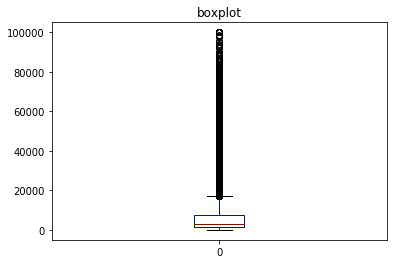

In [120]:
pd.DataFrame(train['price'].values).plot.box(title='boxplot')

In [143]:
train = train[train['price']<15000]

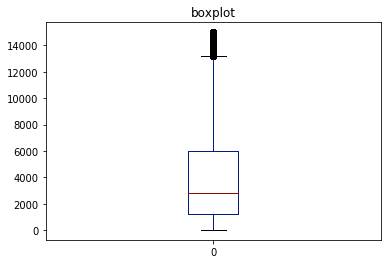

In [144]:
pd.DataFrame(train['price'].values).plot.box(title='boxplot')

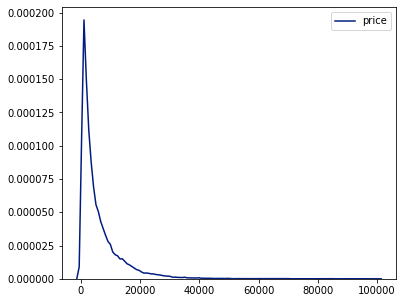

In [149]:
fig = plt.figure(figsize=(6, 5))
plt.style.use('seaborn-dark-palette')
sns.kdeplot(train['price'])
plt.legend(loc='upper right')

In [150]:
import scipy.stats as stats

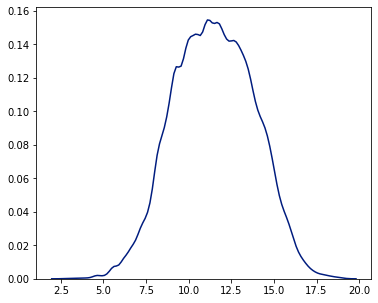

In [151]:
fig = plt.figure(figsize=(6, 5))
plt.style.use('seaborn-dark-palette')
sns.kdeplot(np.array(stats.boxcox(train['price'].values)[0]))

* 相关性分析

In [130]:
numeric_features = ['power', 'kilometer', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14']
categorical_features = ['name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage', 'regionCode']

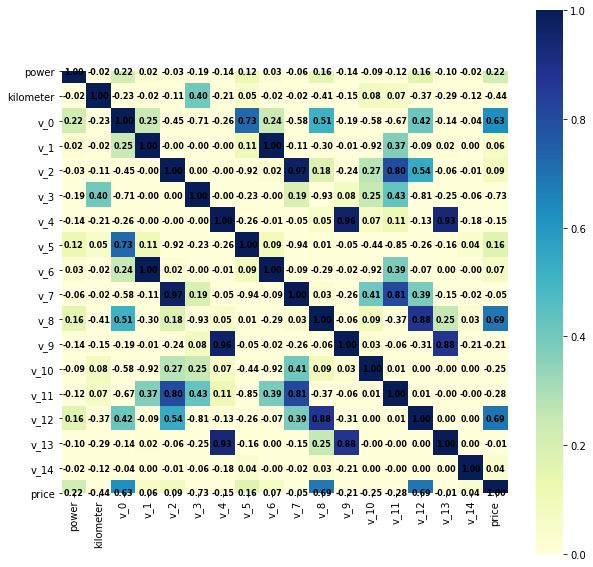

In [135]:
corr1 = train[numeric_features + ['price']].corr()
fig, ax = plt.subplots(figsize = (10,10))
ax.tick_params(axis='y',labelsize=10)
ax.tick_params(axis='x',labelsize=10)
sns.heatmap(corr1,annot=True, square=True,xticklabels=True,fmt='.2f',
            annot_kws={'size':8,'weight':'bold', 'color':'black'},vmax=1,vmin=0,cmap="YlGnBu")